# COMPSCI 524 Fall 2024 Final Project

## Parcel Logistics

by Junyi Ma <jma333@wisc.edu> and Cheng-Hsiang Chiu <cchiu22@wisc.edu>

## Table of Contents

1. [Introduction](#introduction)
1. [Mathematical Model](#model)
    1. [Parameters](#parameters)
    1. [Decision Variables](#decision_variables)
    1. [Constraints](#constraints)
    1. [Objective Function](#objective) 
1. [Dataset and Format](#data)
    1. [Dataset](#dataset)
    1. [Dataset Format](#dataset_format)
1. [Implementation](#implementation)
1. [Visualization](#visualization)
1. [Conclusion](#conclustion)
1. [Reference](#reference)

<a name="introduction"></a>
### 1. Introduction ###


<img src="introduction-to-vrp.svg" style="width: 50%; display: block; margin: 0 auto;" title="Image source: https://pyvrp.org/setup/introduction_to_vrp.html">


Vehicle Routing Problems (VRPs) are a class of combinatorial optimization problems
that involve the optimization of vehicle routes to efficiently serve a set of customers.
These problems arise in various real-world applications, including logistics, transportation, and supply chain management.

The simplest form of VRP is the Capacitated Vehicle Routing Problem (CVRP), where a fleet of vehicles with limited capacity must be dispatched from a depot to serve a set of customers with known demands. The objective is to minimize the total distance traveled by the vehicles while ensuring that all customer demands are satisfied and that no vehicle exceeds its capacity.

Several variants of the VRP have been studied in the literature, each tailored to specific real-world scenarios. Some of these variants include:

* Vehicle Routing Problem with Time Windows (VRPTW): This variant introduces time constraints for each customer, requiring vehicles to arrive within specified time windows.
* Vehicle Routing Problem with Pickup and Delivery (VRPPD): In this variant, each customer has both a pickup and a delivery location, and the vehicle must pick up items at the pickup location before delivering them to the delivery location.
* Vehicle Routing Problem with Simultaneous Pickup and Delivery (VRPSPD): Similar to VRPPD, but the pickup and delivery of each customer must be performed simultaneously.
* Vehicle Routing Problem with Backhauls (VRPB): This variant involves two types of customers: linehaul customers (deliveries) and backhaul customers (pickups). The objective is to minimize the total distance traveled while satisfying all customer demands.
* Capacitated Vehicle Routing Problem (CVRP): In this variant, a fleet of vehicles with limited capacity must be dispatched from a depot to serve a set of customers with known demands.
The objective is to minimize the total distance traveled by the vehicles while ensuring that all customer demands are satisfied and that no vehicle exceeds its capacity.
 
This project focuses on the Capacitated Vehicle Routing Problem (CVRP).
CVRP is a challenging problem due to its combinatorial nature and the need to balance multiple conflicting objectives.
The problem complexity grows exponentially with the number of vehicles and customers, making it difficult to find optimal solutions,
especially for large-scale instances.

Traditional approaches to solving CVRP include exact methods,
such as branch-and-bound and cutting-plane algorithms, and heuristic and metaheuristic methods,
such as local search, tabu search, simulated annealing, and genetic algorithms.
While exact methods can guarantee optimal solutions, they are often computationally expensive and impractical for large-scale instances.
Heuristic and metaheuristic methods, on the other hand, provide approximate solutions in a more efficient manner.

In recent years, there has been a growing interest in using mathematical programming techniques to solve CVRP.
Mathematical programming formulations, such as integer linear programming (ILP) and mixed-integer linear programming (MILP),
can be used to model the problem and obtain optimal or near-optimal solutions.
However, solving large-scale CVRP instances using exact methods can be computationally intensive.

This report presents a novel approach to solving CVRP using linear programming.
By reformulating the problem as a linear program, we aim to develop a more efficient and scalable solution method.
The linear programming formulation will be based on a relaxation of the original CVRP problem,
and we will explore techniques to strengthen the formulation and improve the quality of the solutions.

<a name="model"></a>
### 2. Mathematical Model ###

In the following, we consider a complete graph *G = (V, E)*,
where *V* is the vertex set and *E* is the edge set.
The vertex set *V* is partitioned into *V = V<sub>d</sub> U V<sub>c</sub>*,
where *V<sub>d</sub> = {0, 1, 2, ..., m-1}* represent the set of *m*depots,
and *V<sub>c</sub> = {m, m+1, ... m+n}* denotes the set of *n* clients.
Each edge *(i, j) &#8712; E* has a weight *d<sub>i,j</sub>* denoting the travelling cost (e.g., distance)
when going from *i &#8712; V* to *j &#8712; V*.
A fleet of vehicles *K<sub>i</sub>* is assumed to be available at each depot *i &#8712; V<sub>d</sub>*.

In this project, we study the capacitated vehicle routing problem (CVRP).
In CVRP, each client *i &#8712; V<sub>c</sub>* has a demand *q<sub>i</sub> >= 0*,
and there is a single depot, *V<sub>d</sub> = {0}*.
It is also assumed that the fleet of vehicles is homogeneous,
meaning that they all have the same maximum capacity *Q*.

A feasible solution to the CVRP consists of a set of routes that all begin and end at the depot,
such that each client is visited exactly once and none of the routes exceeds the vehicle capacity.
The objective is to find a feasible solution that minimizes the total travelling cost.

We formualte the CVRP problem as a linear programming optimization problem.
In the following, we will define the three key components, decision variables, constraints, and objective function.
Before the definitions, we will introduce the parameters used in the problem first.

<a name="parameters"></a>
#### 2.A. Parameters ####
* *costs<sub>i,j</sub>* : the distance between the client *i* and the client *j*.
* *demands<sub>i</sub>* : the demand for the clinet *i*.

<a name="decision_variables"></a>
#### 2.B. Decision Variables ####
* *x<sub>i,j,k</sub>* : a binary variable denoting the edge *(i, j) &#8712; E* from the client *i* to the client *j* is visited by the vehicle *k*
* *load<sub>i,k</sub>* : The cumulative load on vehicle *k* after visiting node *i*.
* *u<sub>i,k</sub>* : Auxiliary variable for subtour elimination, representing the position of client *i* in the tour of vehicle *k*
(used in the Miller-Tucker-Zemlin(MTZ) formulation).

<a name="constraints"></a>
#### 2.C. Constraints ####

* Constraint 1. Flow Conservation for Customers : Each client *i &#8712; V* is visited once.
We model this constraint as *∑<sub>k</sub> ∑<sub>j, j≠i</sub> x<sub>i,j,k</sub> = 1* for all *i &#8712; V &#8726; {depot}*

* Constraint 2. Depot Flow for Each Vehicle: Each vehicle starts and ends at the depot.
We model this constraint as *∑<sub>j &#8712; V &#8726; {depot}</sub> x<sub>depot,j,k</sub> = 1* and
*∑<sub>i &#8712; V &#8726; {depot}</sub> x<sub>i,depot,k</sub> = 1* for all *k &#8712; K*

* Constraint 3. Flow Conservation for Vehicles: For each vehicle, the number of arrivals equals the number of departures at each node.
We model this constraint as *∑<sub>j,j ≠ i</sub> x<sub>i,j,k</sub> = ∑<sub>j,j ≠ i</sub> x<sub>j,i,k</sub>* for all *i &#8712; V* and all *k &#8712; K*

* Constraint 4. Capacity Constraints: The load on a vehicle after visiting a node must not exceed its capacity (Q).
We model this constraint as *load<sub>i,k</sub> + demands<sub>i</sub> * ∑<sub>j</sub> x<sub>j,i,k</sub> <= Q* for all *i &#8712; V* and all *k &#8712; K*

* Constraint 5 : Subtour Elimination: To prevent subtours, enforce connectivity using the load variables.
We model this constraint as *u<sub>i,k</sub> - u<sub>j,k</sub> + (#clients + 1) * x<sub>i,j,k</sub> <= #clients* for all *i, j &#8712; V and i ≠ j* and all *k &#8712; K*



<a name="objective"></a>
#### 2.D. Objective Function ####
The objective function of CVPR is to minimize the total travelling cost, that is,
*minimize ∑<sub>k</sub> ∑<sub>i</sub> ∑<sub>j</sub>d<sub>i,j</sub>x<sub>i,j,k</sub>* for all *k &#8712; K*, *i &#8712; V*, and *j &#8712; V*. 

<a name="data"></a>
### 3. Dataset and Format ###

<a name="dataset"></a>
#### 3.A. Dataset ####

The dataset we are using in this project is from the webpage, https://pyvrp.org/examples/quick_tutorial.html.
In addition to the dataset from the webpage, named data2-location.txt and data2-demand.txt,
we genereated a small dataset ourselves, named data1-location.txt and data1-demand.txt.


<a name="dataset_format"></a>
#### 3.B. Dataset Format ####
The dataset includes two text files. The first text file, named data1-location.txt and data2-location.txt, records the coordinates of the depot and the clients. The first entry is the coordinate of the depot and the subsequent entries denote the coordinates of all the clients. The second text file, named data1-demand.txt and data2-demand.txt, records the demands of the depot and the clients. The first entry denotes the demand for the depot, which is 0, as the depot has no demand for vehciles to pick up from. The subsequent entries denote the demands of all the clients. 

<a name="implementation"></a>
### 4. Implementation ###

# Install Ipopt
using Pkg
Pkg.add("Ipopt")
Pkg.add("PyPlot")
Pkg.add("PyCall")   
Pkg.add("Gurobi")
 
using PyCall        
using JuMP, Ipopt, Gurobi, GLPK
using PyPlot
using CSV
using DelimitedFiles

In [2]:
function CVRP(clients, vehicles, capacity, demands, costs)
    model = Model(Gurobi.Optimizer)

    # Define nodes (1 is depot, 2 to n are clients)
    nodes = 1:(clients + 1)
    
    # Define vehicle_set
    vehicle_set = 1:vehicles

    # ------------ Decision variables ------------
    
    # Define x[i,j,k]
    # if vehicle k travels from client i to client j the value is 1
    @variable(model, x[i in nodes, j in nodes, k in vehicle_set], Bin)
  
    # Define load[i,k] the load on vehicle k after visiting client i
    @variable(model, load[i in nodes, k in vehicle_set] >= 0)

    # Define u[i,k] for subtour elimination use
    @variable(model, u[i in 2:(clients + 1), k in vehicle_set] >= 0) 

    
    # ------------ Constraints ------------

    # 1. Each customer is visited exactly once
    for i in 2:(clients + 1)
        @constraint(model, sum(x[i, j, k] for j in nodes, k in vehicle_set if j != i) == 1)
    end

    
    # 2. Each vehicle starts and ends at the depot
    for k in vehicle_set
        @constraint(model, sum(x[1, j, k] for j in 2:(clients + 1)) == 1)  # Start at depot
        @constraint(model, sum(x[i, 1, k] for i in 2:(clients + 1)) == 1)  # Return to depot
    end
    

    # 3. Flow conservation for each vehicle
    for k in vehicle_set, i in 2:(clients + 1)
        @constraint(model, sum(x[j, i, k] for j in nodes if j != i) == sum(x[i, j, k] for j in nodes if j != i))
    end

    
    # 4. Capacity constraints
     for k in vehicle_set, i in 2:(clients + 1)
        @constraint(model, load[i, k] - load[1, k] + demands[i] * sum(x[j, i, k] for j in nodes) <= capacity)
    end

    
    # 5. Subtour elimination constraints
    for k in vehicle_set, i in 2:(clients + 1), j in 2:(clients + 1)
        if i != j
            @constraint(model, u[i, k] - u[j, k] + (clients + 1) * x[i, j, k] <= clients)
        end
    end

    
    # ------------ Objective function ------------
    # Minimize total travel cost
    @objective(model, Min, sum(costs[i, j] * x[i, j, k] for i in nodes, j in nodes, k in vehicle_set))


    # Solve the model
    optimize!(model)
    return (value.(x), value.(load))
end

CVRP (generic function with 1 method)

<a name="visualization"></a>
### 5. Visualization ###

In [3]:
# Running data1

# Define the number of clients
clients = 5

# Define the number of vehicles
vehicles = 2

# Define the maximum capacity of a vehicle
capacity = 10

# Read in the demands of the clients
demands = []
open("data1-demand.txt") do file
    for line in eachline(file)
        #println(line)
        demand = parse.(Int, split(line))
        push!(demands, demand[1])
    end
end

# Read coordinates from the file
data = readdlm("data1-location.txt", ',')
coordinates = data

# Define the cost matrix based on the read-in coordinates
costs = zeros(clients+1, clients+1)
for i in 1:clients+1
    for j in 1:clients+1
        costs[i,j] = (coordinates[i,1] - coordinates[j,1])^2 + (coordinates[i,2] - coordinates[j,2])^2
    end
end

(xopt, loadopt) = CVRP(clients, vehicles, capacity, demands, costs)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-25
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 69 rows, 94 columns and 370 nonzeros
Model fingerprint: 0xc9d11d4e
Variable types: 22 continuous, 72 integer (72 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [6e+03, 8e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 1896632.0000
Presolve removed 10 rows and 24 columns
Presolve time: 0.00s
Presolved: 59 rows, 70 columns, 290 nonzeros
Variable types: 10 continuous, 60 integer (60 binary)

Root relaxation: objective 3.887040e+05, 22 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj

(3-dimensional DenseAxisArray{Float64,3,...} with index sets:
    Dimension 1, 1:6
    Dimension 2, 1:6
    Dimension 3, 1:2
And data, a 6×6×2 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0, 2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, 1:6
    Dimension 2, 1:2
And data, a 6×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0)

Route for Vehicle 1: [1, 4]
Route for Vehicle 2: [1, 2, 3, 6, 5]


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


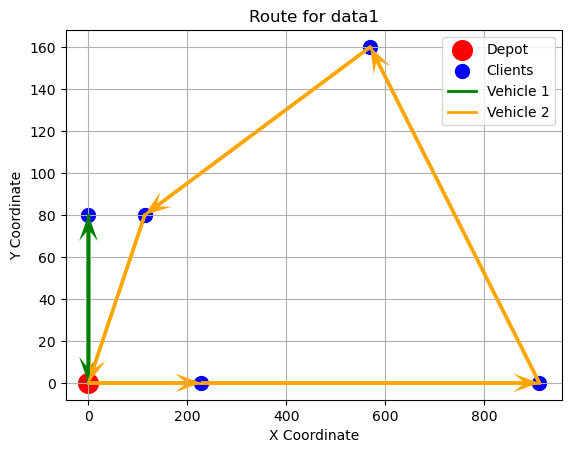

In [4]:
# Visualize the result of data1

# Extract the routes for each vehicle
routes = []
for k in 1:vehicles
    route = [1]  # Start at the depot (node 1)
    current_node = 1
        
    while true
        next_node = nothing
        for j in 2:(clients + 1)  # Exclude depot
            if value(xopt[current_node, j, k]) == 1
                next_node = j
                break
            end
        end
            
        if next_node == nothing
            break
        end
            
        push!(route, next_node)  # Add the next node to the route
        current_node = next_node  # Move to the next node
            
        if current_node == 1  # If we are back at the depot, stop
            break
        end
    end
    push!(routes, route)
    println("Route for Vehicle $k: ", route)
end
    

# Extract coordinates for the plot
x_coords = coordinates[:, 1]
y_coords = coordinates[:, 2]
    
# Plot the coordinates of depot and clients
figure()

PyPlot.scatter(x_coords[1], y_coords[1], color = "red", s = 200, label = "Depot")
PyPlot.scatter(x_coords[2:end], y_coords[2:end], color = "blue", s = 100, label = "Clients")
    
vehicle_colors = ["green", "orange"]
    
# Plot the routes and add arrows to all segments, including return to depot
for k in 1:vehicles
    route = routes[k]
    route_coords = coordinates[route, :]
    color = vehicle_colors[k]  # Select color for the current vehicle
        
    # Plot the route with the same color for the vehicle
    for i in 1:(length(route) - 1)
        start_coords = route_coords[i, :]
        end_coords = route_coords[i + 1, :]
            
        # Plot the line between start and end coordinates
        PyPlot.plot([start_coords[1], end_coords[1]], [start_coords[2], end_coords[2]], color=color, lw=2)
            
        # Add an arrow from the start point to the end point
        PyPlot.quiver(start_coords[1], start_coords[2], end_coords[1] - start_coords[1], end_coords[2] - start_coords[2],
                      angles="xy", scale_units="xy", scale=1, color=color, lw=2, headwidth=5, headlength=7)
    end
        
    # Add the route back to the depot (only once for each vehicle)
    start_coords = route_coords[end, :]
    end_coords = route_coords[1, :]  # Depot (node 1)
        
    PyPlot.plot([start_coords[1], end_coords[1]], [start_coords[2], end_coords[2]], color=color, lw=2,label="Vehicle "*string(k))
    PyPlot.quiver(start_coords[1], start_coords[2], end_coords[1] - start_coords[1], end_coords[2] - start_coords[2],
                  angles="xy", scale_units="xy", scale=1, color=color, lw=2, headwidth=5, headlength=7)
end


PyPlot.title("Route for data1")
PyPlot.xlabel("X Coordinate")
PyPlot.ylabel("Y Coordinate")
PyPlot.legend(loc="best")
PyPlot.grid(true)
PyPlot.show()

In [5]:
# Running data2

# Define the number of clients
clients = 16

# Define the number of vehicles
vehicles = 4

# Define the maximum capacity of a vehicle
capacity = 15

# Read in the demands of the clients
demands = []
open("data2-demand.txt") do file
    for line in eachline(file)
        #println(line)
        demand = parse.(Int, split(line))
        push!(demands, demand[1])
    end
end

# Read coordinates from the file
data = readdlm("data2-location.txt", ',')
coordinates = data

# Define the cost matrix based on the read-in coordinates
costs = zeros(clients+1, clients+1)
for i in 1:clients+1
    for j in 1:clients+1
        costs[i,j] = (coordinates[i,1] - coordinates[j,1])^2 + (coordinates[i,2] - coordinates[j,2])^2
    end
end

(xopt, loadopt) = CVRP(clients, vehicles, capacity, demands, costs)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-25
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i7-8700B CPU @ 3.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1112 rows, 1288 columns and 7296 nonzeros
Model fingerprint: 0x12857442
Variable types: 132 continuous, 1156 integer (1156 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+04, 1e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 64 rows and 136 columns
Presolve time: 0.01s
Presolved: 1048 rows, 1152 columns, 6080 nonzeros
Variable types: 64 continuous, 1088 integer (1088 binary)

Root relaxation: objective 7.230720e+05, 130 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent  

(3-dimensional DenseAxisArray{Float64,3,...} with index sets:
    Dimension 1, 1:17
    Dimension 2, 1:17
    Dimension 3, 1:4
And data, a 17×17×4 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …

Route for Vehicle 1: [1, 14, 13, 16, 12, 4, 5, 2, 8]
Route for Vehicle 2: [1, 15, 17, 11, 3, 7, 9]
Route for Vehicle 3: [1, 6]
Route for Vehicle 4: [1, 10]


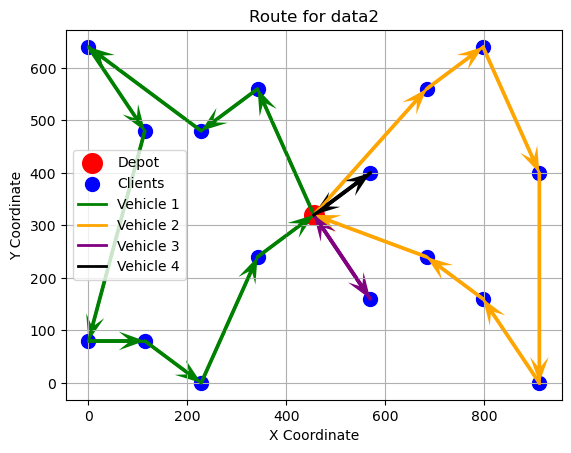

In [6]:
# Visualize the result of data2

# Extract the routes for each vehicle
routes = []
for k in 1:vehicles
    route = [1]  # Start at the depot (node 1)
    current_node = 1
        
    while true
        next_node = nothing
        for j in 2:(clients + 1)  # Exclude depot
            if value(xopt[current_node, j, k]) == 1
                next_node = j
                break
            end
        end
            
        if next_node == nothing
            break
        end
            
        push!(route, next_node)  # Add the next node to the route
        current_node = next_node  # Move to the next node
            
        if current_node == 1  # If we are back at the depot, stop
            break
        end
    end
    push!(routes, route)
    println("Route for Vehicle $k: ", route)
end
    

# Extract coordinates for the plot
x_coords = coordinates[:, 1]
y_coords = coordinates[:, 2]
    
# Plot the coordinates of depot and clients
figure()

PyPlot.scatter(x_coords[1], y_coords[1], color = "red", s = 200, label = "Depot")
PyPlot.scatter(x_coords[2:end], y_coords[2:end], color = "blue", s = 100, label = "Clients")
    
vehicle_colors = ["green", "orange", "purple", "black"]
    
# Plot the routes and add arrows to all segments, including return to depot
for k in 1:vehicles
    route = routes[k]
    route_coords = coordinates[route, :]
    color = vehicle_colors[k]  # Select color for the current vehicle
        
    # Plot the route with the same color for the vehicle
    for i in 1:(length(route) - 1)
        start_coords = route_coords[i, :]
        end_coords = route_coords[i + 1, :]
            
        # Plot the line between start and end coordinates
        PyPlot.plot([start_coords[1], end_coords[1]], [start_coords[2], end_coords[2]], color=color, lw=2)
            
        # Add an arrow from the start point to the end point
        PyPlot.quiver(start_coords[1], start_coords[2], end_coords[1] - start_coords[1], end_coords[2] - start_coords[2],
                      angles="xy", scale_units="xy", scale=1, color=color, lw=2, headwidth=5, headlength=7)
    end
        
    # Add the route back to the depot (only once for each vehicle)
    start_coords = route_coords[end, :]
    end_coords = route_coords[1, :]  # Depot (node 1)
        
    PyPlot.plot([start_coords[1], end_coords[1]], [start_coords[2], end_coords[2]], color=color, lw=2, label="Vehicle "*string(k))
    PyPlot.quiver(start_coords[1], start_coords[2], end_coords[1] - start_coords[1], end_coords[2] - start_coords[2],
                  angles="xy", scale_units="xy", scale=1, color=color, lw=2, headwidth=5, headlength=7)
end
    
PyPlot.title("Route for data2")
PyPlot.xlabel("X Coordinate")
PyPlot.ylabel("Y Coordinate")
PyPlot.legend(loc = "best")
PyPlot.grid(true)
PyPlot.show()

<a name="conclusion"></a>
### 6. Conclusion ###

In this report, we have explored the Capacitated Vehicle Routing Problem (CVRP),
a complex optimization problem that arises in various logistics and transportation applications.
We have delved into its mathematical formulation, defining the decision variables, objective function, and constraints.

To address the challenges associated with CVRP, we have employed a mathematical programming approach,
specifically using the Miller-Tucker-Zemlin (MTZ) subtour elimination constraints to ensure feasible solutions.
By formulating the problem as a mixed-integer linear program (MILP),
we can leverage powerful optimization solvers like Gurobi or CPLEX to obtain optimal or near-optimal solutions.

The implementation of the CVRP model in a programming language like Julia,
coupled with the use of efficient solvers (e.g., Gurobi), enables us to tackle real-world instances of varying complexity.
By carefully formulating the problem and tuning the solver parameters,
we can obtain high-quality solutions that minimize costs and improve operational efficiency.

While CVRP is a well-studied problem, there are still opportunities for further research and development.
Exploring advanced solution techniques, such as metaheuristics or hybrid approaches,
can lead to improved performance and scalability.
Additionally, incorporating real-world factors like traffic congestion, time windows,
and uncertain demand can make the problem even more challenging and relevant.

<a name="reference"></a>
### 7. Reference ###

* <a href="https://dl.acm.org/doi/10.1145/321043.321046">Miller, C. E., Tucker, A. W., & Zemlin, R. A. (1960). Integer programming formulation of traveling salesman problems. Journal of the ACM (JACM), 7(4), 326-329</a>.
* <a href="https://en.wikipedia.org/wiki/Vehicle_routing_problem">Vehcile Routing Problem (VRP), Wikipedia.</a>